## Дополнительный семинар 2. Введение в вейвлет-анализ сигналов

In [44]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import pywt # PyWavelets - Wavelet Transforms in Python

import warnings
warnings.filterwarnings('ignore')

## От базиса Фурье к вейвлет-базису

Любой сигнал $x(t)$ из векторного пространства ${{L}_{2}}[0,\ T]$ функций с интегрируемым квадратом,
$$\int\limits_{0}^{T}{\,{{\left| x(t) \right|}^{2}}}dt<\infty ,$$
можно представить рядом Фурье
$$x(t)=\sum\limits_{n\ =\ -\infty }^{\infty }{{{A}_{n}}\,e{{\ }^{j\frac{2\pi }{T}nt}}},$$                     
где коэффициенты Фурье
$${{A}_{n}}=\frac{1}{T}\int\limits_{-T/2}^{T/2}{x(t)\ e{{\ }^{-j\frac{2\pi }{T}nt}}}dt.$$                  
Имеются две особенности разложений в ряды Фурье. 
* Первая особенность состоит в том, что $x(t)$разлагается в бесконечную сумму взаимно ортогональных компонент ${{A}_{n}}\,e{{\ }^{j\frac{2\pi }{T}nt}}.$ 
* Вторая особенность состоит в том, что ортогональный базис $\left\{ {{\varphi }_{n}} \right\}$порождается растяжением единственной функции
$\varphi (t)=e{{\ }^{j\frac{2\pi }{T}t}},$
так, что ${{\varphi }_{n}}(t)=\varphi (nt)$ для всех целых $n.$


Рассмотрим также пространство ${{L}_{2}}(\mathbb{R})$ измеримых функций, определённых на вещественной оси $\mathbb{R},$ удовлетворяющих неравенству 
$$\int\limits_{-\infty }^{\infty }{\,{{\left| x(t) \right|}^{2}}}dt<\infty .$$

* Каждая функция из ${{L}_{2}}(\mathbb{R})$ должна затухать до нуля при $t\to \pm \infty$. 

* Синусоидальные (волны) функции ${{\varphi }_{n}}(t)$ не принадлежат ${{L}_{2}}(\mathbb{R}).$ Поэтому, если мы хотим использовать «волны», порождающие ${{L}_{2}}(\mathbb{R}),$ то эти волны должны затухать до нуля при $t\to \pm \infty ,$ и это затухание должно быть быстрым. Так мы приходим к рассмотрению малых волн, или вейвлетов, для порождения ${{L}_{2}}(\mathbb{R}).$ 

* Как и в случае ${{L}_{2}}[0,\ T],$ когда одна функция $\varphi (t)=\exp \left(j\dfrac{2\pi }{T}t \right)$ порождает целое пространство, мы должны иметь одну функцию для порождения всего ${{L}_{2}}(\mathbb{R})$. Будем обозначать её через $\psi(t) .$ 

* Чтобы покрыть всё множество $\mathbb{R},$ из материнского вейвлета $\psi(t)$ за счёт операций **сдвига во времени $(b)$** и изменения временного **масштаба $(a)$** сконструируем набор функций 
$${{\psi }_{ab}}(t)=\frac{1}{\sqrt{\left| a \right|}}\psi \left( \frac{t-b}{a} \right). $$ 

## Признаки вейвлета
Рассмотрим свойства, которыми должна обладать функция материнского вейвлета $\psi(t).$
* **Нулевое среднее**. График исходной функции должен осциллировать вокруг нуля по оси времени и иметь нулевую площадь
$$\int\limits_{-\infty }^{\infty }{\psi (t)dt=0.}$$                                      
Равенство нулю площади, т.е. нулевого момента, приводит к тому, что фурье-преобразование ${{S}_{\psi }}(f)$ этой функции равно нулю при $f=0$ и имеет вид частотной характеристики полосового фильтра. При различных значениях коэффициента $a$ имеем набор полосовых фильтров.
Для приложений часто оказывается необходимым, чтобы не только нулевой, но и все первые $m$ моментов были равны нулю:
$$\int\limits_{-\infty }^{\infty }{{{t}^{m}}\psi (t)dt=0.}$$                                   
Такой вейвлет называется вейвлетом $m$-го порядка и позволяет анализировать высокочастотную структуру сигнала, подавляя медленно изменяющиеся его составляющие.
* **Локализация**. Вейвлет  должен быть локализован и во времени, и по частоте. Для этого достаточно, чтобы выполнялись условия для некоторых  $C$, $\varepsilon >0$:
$$\left| \psi (t) \right|\le C/(1+\left| t \right|){{}^{1+\varepsilon }},$$
$$\left| {{S}_{\psi }}(f) \right|\le C/(1+\left| f \right|){{}^{1+\varepsilon }}.$$
* **Ограниченность**. Квадрат нормы функции должен быть конечным:
$${{\left\| \psi  \right\|}^{2}}=\int\limits_{-\infty }^{\infty }{{{\left| \psi (t) \right|}^{2}}dt<\infty .}$$
* **Автомодельность**. Все вейвлеты  семейства ${{\psi }_{ab}}(t)$ имеют то же число осцилляций, что и материнский вейвлет $\psi (t),$ поскольку получены из него посредством масштабных преобразований $(a)$ и сдвига $(b).$


## Примеры вейвлетов: вещественные непрерывные вейвлеты на основе функции Гаусса

### WAVE-вейвлет 

$$\psi(t)=-t \exp \left(-\dfrac{t^2}{2} \right)$$

$$\psi_{ab}(t)=-\dfrac{(t-b)}{a\sqrt{a}} \exp \left(-\dfrac{(t-b)^2}{2a^2} \right)$$

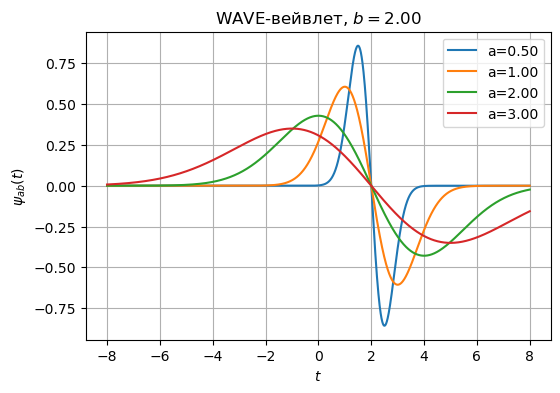

In [45]:
plt.figure(figsize=[6, 4])
t = np.linspace(-8, 8, 2**11)
b=2
for a in [0.5, 1, 2, 3]:
    ta=(t-b)/a
    wavelet=-ta*np.exp(-ta**2/2) / np.sqrt(a)
    plt.plot(t, wavelet, label="a=%.2f" %a)
plt.legend()
plt.xlabel("$t$")
plt.title("WAVE-вейвлет, $b=$%.2f" %b)
plt.ylabel("$\\psi_{ab}(t)$")
plt.grid()

WAVE-вейвлет является вейвлетом нулевого порядка.
$$\int\limits_{-\infty }^{\infty }{{{t}^{m}}\psi (t)dt=0}.$$
* Нулевой момент равен нулю в силу нечетности функции $\psi(t)=-t \exp \left(-\dfrac{t^2}{2} \right)$.
* В то же время равенство нулю первого момента не будет:
$$\int\limits_{-\infty }^{\infty }-t^2 \exp \left(-\dfrac{t^2}{2} \right) dt\ne0.$$

В связи с этим WAVE-вейвлет обычно не используется для анализа высокочастной структуры сигнала. 

### MHAT-вейвлет (мексиканская шляпа, вейвлет Рикера)


$$\psi(t)=\gamma (1-t^2) \exp \left(-\dfrac{t^2}{2} \right),$$


$$\psi_{ab}(t) = \dfrac{\gamma}{\sqrt{a}} \left({1-\dfrac{(t-b)^2}{a^2}}\right)\exp \left(-\dfrac{(t-b)^2}{2a^2} \right).$$

Нормировка, обозначенная здесь как $\gamma$, в литературе встречается в одном из следующих видов: $\gamma=\dfrac{2}{\sqrt{3}\sqrt[4]{\pi}}$ или $\gamma=1$. Нулевой и первый моменты MHAT-вейвлеты равны нулю, поэтому он хорошо приспособлен для анализа сложных сигналов, и достаточно широко используется.

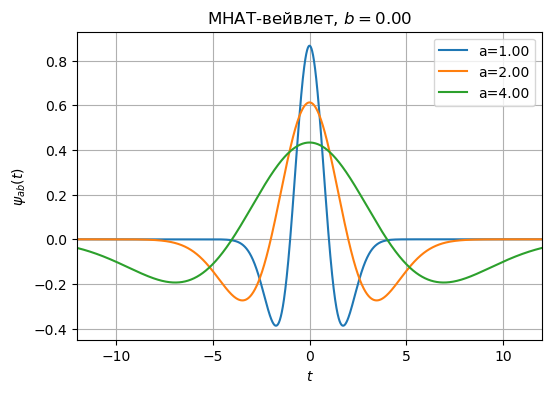

In [46]:
plt.figure(figsize=[6, 4])
gamma=2/(np.sqrt(3)*(np.pi**0.25))
t = np.linspace(-12, 12, 2**11)
b=0
for a in [1, 2, 4]:
    ta=(t-b)/a
    wave=gamma*(1-ta**2)*np.exp(-ta**2/2) / np.sqrt(a)
    plt.plot(t, wave, label="a=%.2f" %a)
plt.legend()
plt.xlabel("$t$")
plt.title("MHAT-вейвлет, $b=$%.2f" %b)
plt.ylabel("$\\psi_{ab}(t)$")
plt.xlim([t[0], t[-1]])
plt.grid()

`scipy.signal.ricker(points, a)`

Return a Ricker wavelet, also known as the “Mexican hat wavelet”.

It models the function:
`A * (1 - (x/a)**2) * exp(-0.5*(x/a)**2),`
where `A = 2/(sqrt(3*a)*(pi**0.25)).`

**Parameters**
* `points` *int* Number of points in vector. Will be centered around 0.

* `a` *scalar* Width parameter of the wavelet.

**Returns**
* `vector(N,)` *ndarray* Array of length points in shape of ricker curve.

In [47]:
# scipy.signal.ricker(points, a) sourse code
def ricker(points, a):
    A = 2 / (np.sqrt(3 * a) * (np.pi**0.25))
    wsq = a**2
    vec = np.arange(0, points) - (points - 1.0) / 2
    xsq = vec**2
    mod = (1 - xsq / wsq)
    gauss = np.exp(-xsq / (2 * wsq))
    total = A * mod * gauss
    return total

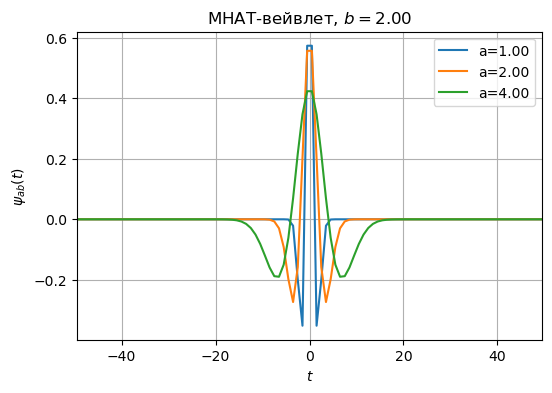

In [48]:
plt.figure(figsize=[6, 4])
points=100
t = np.arange(0, points) - (points - 1.0) / 2
b=2
for a in [1, 2, 4]:
    wavelet=signal.ricker(points, a)
    plt.plot(t, wavelet, label="a=%.2f" %a)
plt.legend()
plt.xlabel("$t$")
plt.title("MHAT-вейвлет, $b=$%.2f" %b)
plt.ylabel("$\\psi_{ab}(t)$")
plt.xlim([t[0], t[-1]])
plt.grid()

### DOG-вейвлет (difference of gaussians)

$$\psi(t)= \exp\left(-\dfrac{t^2}{2} \right)-\dfrac{1}{2}\exp\left(-\dfrac{t^2}{8} \right),$$

$$\psi_{ab}(t)=\dfrac{1}{\sqrt{a}} \exp \left(-\dfrac{(t-b)^2}{2a^2} \right)-\dfrac{1}{2\sqrt{a}} \exp \left(-\dfrac{(t-b)^2}{8a^2} \right)$$

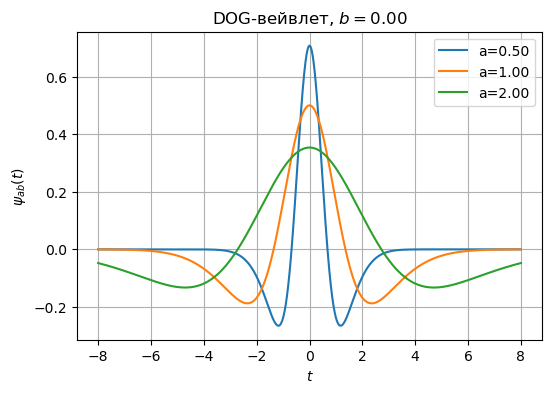

In [49]:
plt.figure(figsize=[6, 4])
t = np.linspace(-8, 8, 2**11)
b=0
for a in [0.5, 1, 2]:
    ta=(t-b)/a
    wavelet=(np.exp(-ta**2/2)-0.5*np.exp(-ta**2/8)) / np.sqrt(a)
    plt.plot(t, wavelet, label="a=%.2f" %a)
plt.legend()
plt.xlabel("$t$")
plt.title("DOG-вейвлет, $b=$%.2f" %b)
plt.ylabel("$\\psi_{ab}(t)$")
plt.grid()

Графики внешне напоминают MHAT-вейвлет, однако определяются другими функциями. 

## Вейвлет-преобразование
Интегральное вейвлет преобразование сигнала $x(t)$
$${{W}_{x}}(a,b)=\int\limits_{-\infty }^{\infty }{x(t)}{{\psi }^{*}}_{ab}(t)dt=\frac{1}{\sqrt{\left| a \right|}}\int\limits_{-\infty }^{\infty }{x(t)}{{\psi }^{*}}\left( \frac{t-b}{a} \right)dt.$$  
С учётом ограниченной области  $\mathbb{R}$ определения сигналов и $a,b\in \mathbb{R},\quad a\ne 0:$
$${{W}_{x}}(a,b)=\frac{1}{\sqrt{\left| a \right|}}\int\limits_{R}{x(t){{\psi }^{*}}\left( \frac{t-b}{a} \right)dt},$$                
Вейвлет-спектр ${{W}_{x}}(a,b)$ (масштабно-временной спектр) в отличие от фурье-спектра является функцией двух аргументов: первый аргумент $а$ (временной масштаб) обратен частоте, а второй  $b$ – аналогичен смещению сигнала во времени. При этом $a,b\in \mathbb{R},\;a\ne 0.$. 
Следует отметить, что ${{W}_{x}}({{a}_{0}},b)$ характеризует временную зависимость (при $a={{a}_{0}})\text{,}$ тогда как ${{W}_{x}}(a,{{b}_{0}})$ – частотную зависимость (при $b={{b}_{0}})\text{.}$ 


## Свойства вейвлет-преобразования
* **Линейность.**
$${{W}_{\alpha x(t)+\beta y(t)}}(a,b)=\alpha {{W}_{x}}(a,b)+\beta {{W}_{y}}(a,b)\text{.}$$         
* **Теорема запаздывания.** Сдвиг сигнала во времени на ${{b}_{0}}$ приводит к сдвигу вейвлет-образа также на ${{b}_{0}}\text{:}$
$${{W}_{x(t-{{b}_{0}})}}(a,b)={{W}_{x}}(a,b-{{b}_{0}})\text{.}$$                       
* **Теорема об изменении масштаба.** Растяжение (сжатие) сигнала приводит к растяжению (сжатию) вейвлет образа:
$${{W}_{x(t/{{a}_{0}})}}(a,b)=\frac{1}{{{a}_{0}}}{{W}_{x}}\left(\frac{a}{{{a}_{0}}},\frac{b}{{{a}_{0}}}\right)\text{.}$$                   
* **Дифференцирование:**
$${{W}_{d_{t}^{m}x}}(a,b)={{(-1)}^{m}}\int\limits_{-\infty }^{\infty }{x(t)}d_{t}^{m}\left[ {{\psi }^{*}}_{ab}(t) \right]dt,$$                
где $d_{t}^{m}={{d}^{m}}\left[ \ldots  \right]/d{{t}^{m}},\ \ m\ge 1.$
Из этого свойства следует, что проанализировать особенности высокого порядка или мелкомасштабные вариации сигнала $x(t)$ можно дифференцированием нужного числа раз либо вейвлета, либо самого сигнала. Это  свойство особенно полезно когда сигнал задан дискретным рядом.


## Оценка ${{W}_{x}}(a,b)$ с помощью signal.cwt

```scipy.signal.cwt(data, wavelet, widths, dtype=None, **kwargs)```
Continuous wavelet transform.

Performs a continuous wavelet transform on data, using the wavelet function. A CWT performs a convolution with data using the wavelet function, which is characterized by a width parameter and length parameter. The wavelet function is allowed to be complex.

**Parameters**

`data(N,)` *ndarray*
data on which to perform the transform.

`wavelet` *function*
Wavelet function, which should take 2 arguments. The first argument is the number of points that the returned vector will have (len(wavelet(length,width)) == length). The second is a width parameter, defining the size of the wavelet (e.g. standard deviation of a gaussian). See ricker, which satisfies these requirements.

`widths` *(M,) sequence*
Widths to use for transform.

`dtype` *data-type, optional*
The desired data type of output. Defaults to `float64` if the output of wavelet is real and `complex128` if it is complex. New in version 1.4.0.
`kwargs`
Keyword arguments passed to wavelet function. New in version 1.4.0.

**Returns**

`cwt` *(M, N) ndarray* Will have shape of `(len(widths), len(data))`.

## Способы представления результата вейвлет-преобразования. 

* Функция ${{W}_{x}}(a,b)$ для действительного сигнала и действительно-значной функции $\psi(t)$ (существуют из комплеснозначные вейвлеты) описывает поверхность в трехмерном пространстве. Поэтому как и для спектрограммы (STFT) мы можем использовать двумерный рисунок, отображая третью ось цветом. Отличие заключается в том, что ${{W}_{x}}(a,b)$ может принимать как положительные, так и отрицательные значения, и нам важно их различать на графике. Помимо цвета, можно отображать уровни изолиниями.


* Картина линий локальных экстремумов (или только локальных максимумов) функции ${{W}_{x}}(a,b)$ называется скелетоном. Скелетон по локальным максимумам можно вычислить, например, по формуле
${{S}_{x}}({{a}_{i}},{{b}_{j}})=\left\{ \begin{matrix}
   {{W}_{x}}({{a}_{i}},{{b}_{j}}),\ \text{ если }{{W}_{x}}({{a}_{i-1}},{{b}_{j}})<{{W}_{x}}({{a}_{i}},{{b}_{j}})<{{W}_{x}}({{a}_{i+1}},{{b}_{j}})\text{ или } {{W}_{x}}({{a}_{i-1}},{{b}_{j}})<{{W}_{x}}({{a}_{i}},{{b}_{j}})<{{W}_{x}}({{a}_{i+1}},{{b}_{j}});  \\
   0,\ \text{ иначе}.  \\
\end{matrix} \right.$


In [50]:
def skeleton_est(cwtmatr):
    skeleton=np.zeros_like(cwtmatr)
    for raw in range(1, cwtmatr.shape[0]-1):
        for col in range(1, cwtmatr.shape[1]-1):
            cond1 = cwtmatr[raw, col]<cwtmatr[raw, col-1] and cwtmatr[raw, col]<cwtmatr[raw, col+1]
            cond2 = cwtmatr[raw, col]>cwtmatr[raw, col-1] and cwtmatr[raw, col]>cwtmatr[raw, col+1]
            cond3 = cwtmatr[raw, col]>cwtmatr[raw-1, col] and cwtmatr[raw, col]>cwtmatr[raw+1, col]
            cond4 = cwtmatr[raw, col]<cwtmatr[raw-1, col] and cwtmatr[raw, col]<cwtmatr[raw+1, col]
            if cond1 or cond2: #or cond3 or cond4:
                skeleton[raw, col] = cwtmatr[raw, col]
    return skeleton

## Примеры вейвлет-преобразований

В этом разделе все вычисления мы произведем с помощью вейвлета Рикера (мексиканская шляпа), у которого нулевой и первый моменты равны нулю. 

$$\psi(t)=\gamma (1-t^2) \exp \left(-\dfrac{t^2}{2} \right), \;\;\gamma=\dfrac{2}{\sqrt{3}\sqrt[4]{\pi}},$$

$${{W}_{x}}(a,b)=\frac{1}{\sqrt{\left| a \right|}}\int\limits_{R}{x(t){{\psi }^{*}}\left( \frac{t-b}{a} \right)dt}.$$

Отметим, что для вейвлета Рикера характерному масштабу $a$ вейвлет-преобразования соотвествует временному масштаб сигнала  $d=a\pi/{\sqrt{2}}$. Если половина периода синуса $a\pi/{\sqrt{2}}$, то мы ожидаем максимумы на масштабе $a$.

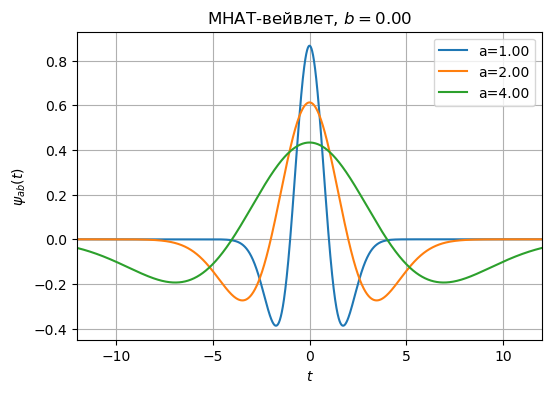

In [51]:
plt.figure(figsize=[6, 4])
gamma=2/(np.sqrt(3)*(np.pi**0.25))
t = np.linspace(-12, 12, 2**11)
b=0
for a in [1, 2, 4]:
    ta=(t-b)/a
    wave=gamma*(1-ta**2)*np.exp(-ta**2/2) / np.sqrt(a)
    plt.plot(t, wave, label="a=%.2f" %a)
plt.legend()
plt.xlabel("$t$")
plt.title("MHAT-вейвлет, $b=$%.2f" %b)
plt.ylabel("$\\psi_{ab}(t)$")
plt.xlim([t[0], t[-1]])
plt.grid()

### Пример 1. Синусоида.

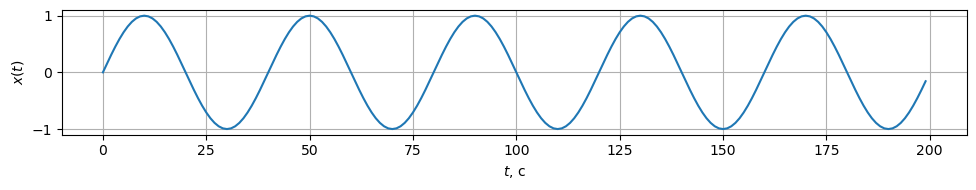

In [52]:
#t = np.linspace(0, 1, 200, endpoint=False)
t=np.arange(0, stop=200, step=1)
sig  = np.sin(2 * np.pi * 0.025 * t) #+ signal.gausspulse(t - 0.4, fc=2)
widths = np.arange(1, 50)
cwtmatr = signal.cwt(sig, signal.ricker, widths)

plt.figure(figsize=[10, 2])
plt.plot(t, sig)
plt.xlabel("$t$, c")
plt.ylabel("$x(t)$")
plt.tight_layout()
plt.grid()

Если половина периода синуса $a\pi/{\sqrt{2}}$, то мы ожидаем максимумы на масштабе $a$ 

(то есть $T/2 = a \pi /\sqrt{2}$)

In [53]:
dt = t[1]-t[0]
T=dt/0.025
a0 = (T/2)*np.sqrt(2)/np.pi
a0

9.003163161571061

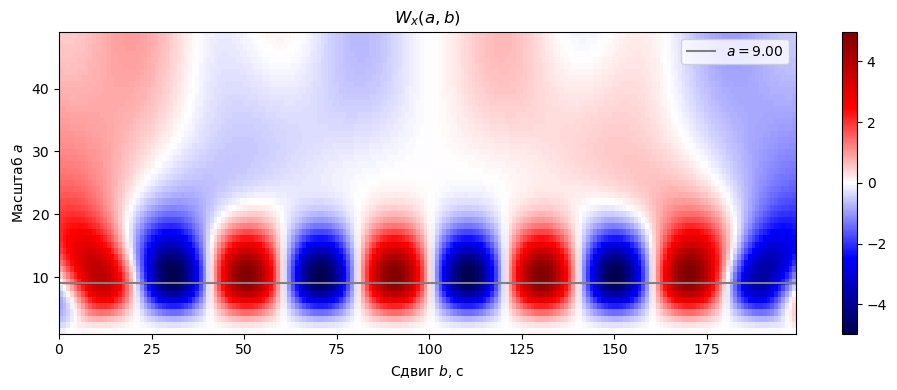

In [54]:
plt.figure(figsize=[10, 4])

plt.imshow(cwtmatr, extent=[t[0], t[-1], dt*widths[0], dt*widths[-1]], cmap='seismic', aspect='auto', origin='lower')
plt.plot([t[0], t[-1]], [a0, a0], 'grey', label="$a=$%.2f" %a0)
plt.xlabel('Сдвиг $b$, c')
plt.ylabel('Масштаб $a$')
plt.title('${{W}_{x}}(a,b)$')
plt.colorbar()
plt.legend()
plt.tight_layout()

Темно-красные области соответствуют локальным максимумам отдельных составляющих сигнала, темно-синие – локальным минимумам, а белые – переходу через нуль. 

### Пример 2. Две синусоиды, $f_2=5f_1$.

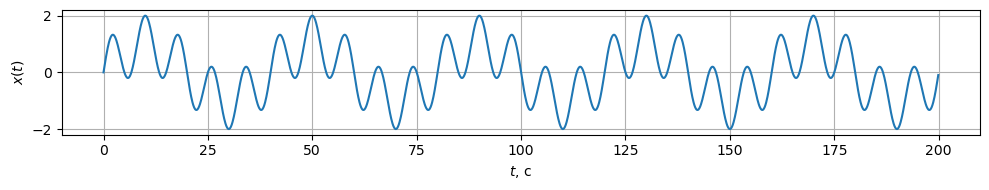

In [55]:
#t = np.linspace(0, 1, 200, endpoint=False)
t=np.arange(0, stop=200, step=0.1)
sig  = np.sin(2 * np.pi * 0.025 * t) + np.sin(2 * np.pi * 0.025*5 * t) 
widths = np.arange(1, 200)
cwtmatr = signal.cwt(sig, signal.ricker, widths)

plt.figure(figsize=[10, 2])
plt.plot(t, sig)
plt.xlabel("$t$, c")
plt.ylabel("$x(t)$")
plt.tight_layout()
plt.grid()

In [56]:
dt = t[1]-t[0]
T=dt/0.025
a0 = (T/2)*np.sqrt(2)/np.pi / dt
a0

9.003163161571061

In [57]:
T=dt/(0.025*5)
a1 = (T/2)*np.sqrt(2)/np.pi / dt
a1

1.8006326323142123

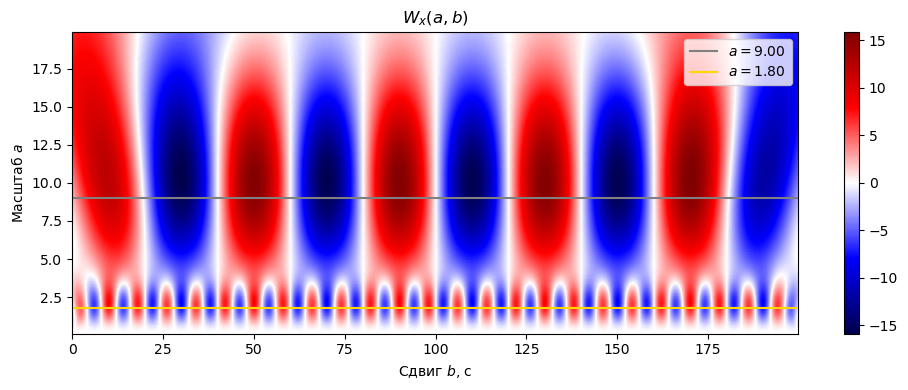

In [58]:
plt.figure(figsize=[10, 4])

plt.imshow(cwtmatr, extent=[t[0], t[-1], dt*widths[0], dt*widths[-1]], cmap='seismic', aspect='auto', origin='lower')
plt.plot([t[0], t[-1]], [a0, a0], 'grey', label="$a=$%.2f" %a0)
plt.plot([t[0], t[-1]], [a1, a1], 'gold', label="$a=$%.2f" %a1)
plt.xlabel('Сдвиг $b$, c')
plt.ylabel('Масштаб $a$')
plt.title('${{W}_{x}}(a,b)$')
plt.colorbar()
plt.legend()
plt.tight_layout()

Темно-красные области соответствуют локальным максимумам отдельных составляющих сигнала, темно-синие – локальным минимумам, а белые – переходу через нуль.  Скелетон для этого сигнала имеет вид:

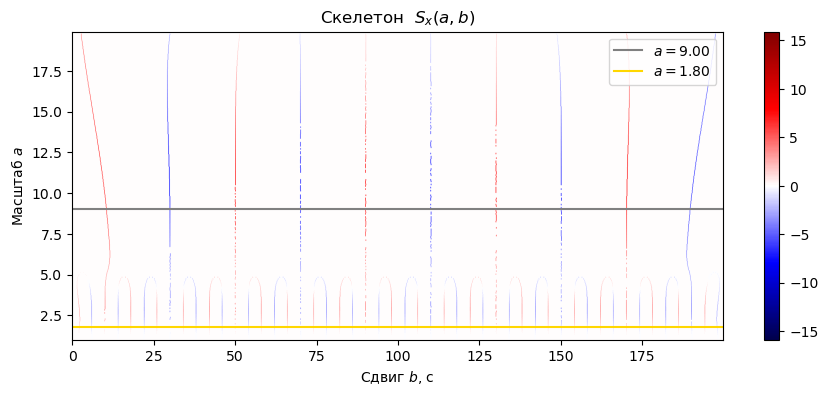

In [59]:
plt.figure(figsize=[10.5, 4])
max_abs = max([np.max(skeleton_est(cwtmatr)), - np.min(skeleton_est(cwtmatr))])

plt.imshow(skeleton_est(cwtmatr), extent=[t[0], t[-1], widths[0], widths[-1]*dt], 
           vmin = -max_abs,
           vmax = max_abs,
           cmap='seismic', aspect='auto', origin='lower')
plt.plot([t[0], t[-1]], [a0, a0], 'grey', label="$a=$%.2f" %a0)
plt.plot([t[0], t[-1]], [a1, a1], 'gold', label="$a=$%.2f" %a1)
plt.xlabel('Сдвиг $b$, c')
plt.ylabel('Масштаб $a$')
plt.title('Скелетон  ${{S}_{x}}(a,b)$')
plt.legend()
plt.colorbar()
plt.show()

### Пример 3. Две синусоиды, $f_2=2f_1$.

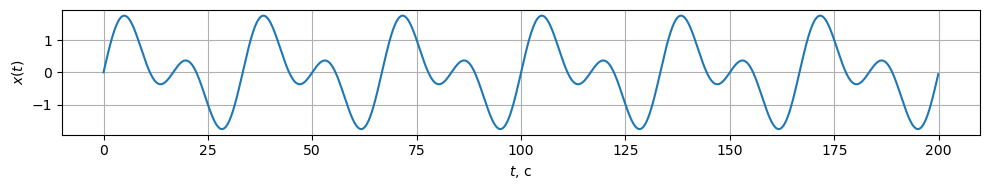

In [60]:
#t = np.linspace(0, 1, 200, endpoint=False)
t=np.arange(0, stop=200, step=0.1)
sig  = np.sin(2 * np.pi * 0.03 * t) + np.sin(2 * np.pi * 0.03*2 * t) 
widths = np.arange(1, 150)
cwtmatr = signal.cwt(sig, signal.ricker, widths)

plt.figure(figsize=[10, 2])
plt.plot(t, sig)
plt.xlabel("$t$, c")
plt.ylabel("$x(t)$")
plt.tight_layout()
plt.grid()

In [61]:
dt = t[1]-t[0]
T=dt/0.03
a0 = (T/2)*np.sqrt(2)/np.pi / dt
a0

7.502635967975884

In [62]:
T=dt/(0.03*2)
a1 = (T/2)*np.sqrt(2)/np.pi / dt
a1

3.751317983987942

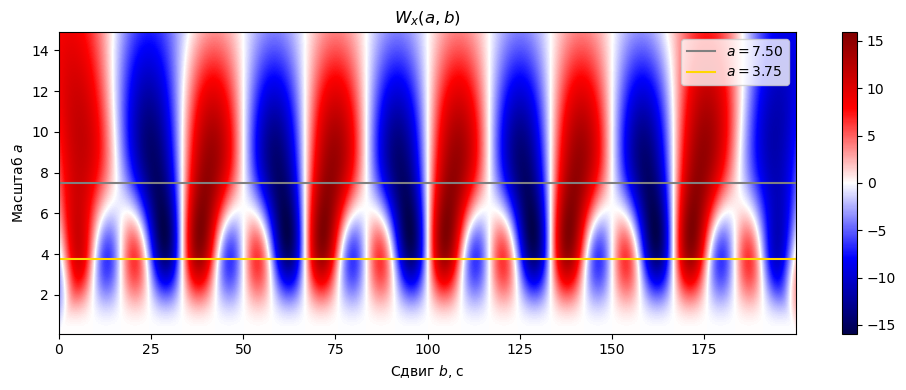

In [63]:
plt.figure(figsize=[10, 4])

plt.imshow(cwtmatr, extent=[t[0], t[-1], dt*widths[0], dt*widths[-1]], cmap='seismic', aspect='auto', origin='lower')
plt.plot([t[0], t[-1]], [a0, a0], 'grey', label="$a=$%.2f" %a0)
plt.plot([t[0], t[-1]], [a1, a1], 'gold', label="$a=$%.2f" %a1)
plt.xlabel('Сдвиг $b$, c')
plt.ylabel('Масштаб $a$')
plt.title('${{W}_{x}}(a,b)$')
plt.colorbar()
plt.legend()
plt.tight_layout()

### Пример 4. Сигнал с изменяющейся мгновенной частотой и скачком. 

In [64]:
signal.unit_impulse(shape=len(t), idx=len(t)//2)

array([0., 0., 0., ..., 0., 0., 0.])

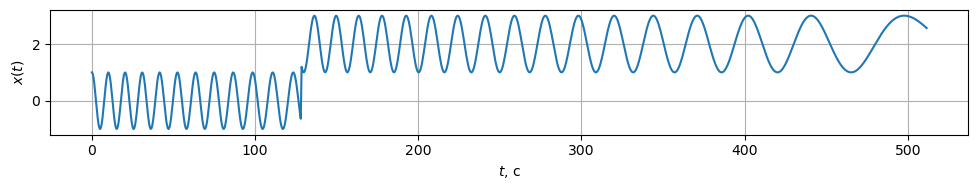

In [65]:
t = np.linspace(0, 512, 1024, endpoint=False)
dt=t[1]-t[0]
step = np.zeros_like(t)
for u in range(len(step)):
    if u > len(step)//4:
        step[u]=2

sig  = signal.chirp(t, f0=1/10, f1=1/100, t1=512, method='linear') + step

widths = np.arange(1, 70)
cwtmatr = signal.cwt(sig, signal.ricker, widths)

plt.figure(figsize=[10, 2])
plt.plot(t, sig)
plt.xlabel("$t$, c")
plt.ylabel("$x(t)$")
plt.tight_layout()
plt.grid()

In [66]:
dt = t[1]-t[0]
T=dt*10
a0 = (T/2)*np.sqrt(2)/np.pi / dt
T=dt*100
a1 = (T/2)*np.sqrt(2)/np.pi / dt

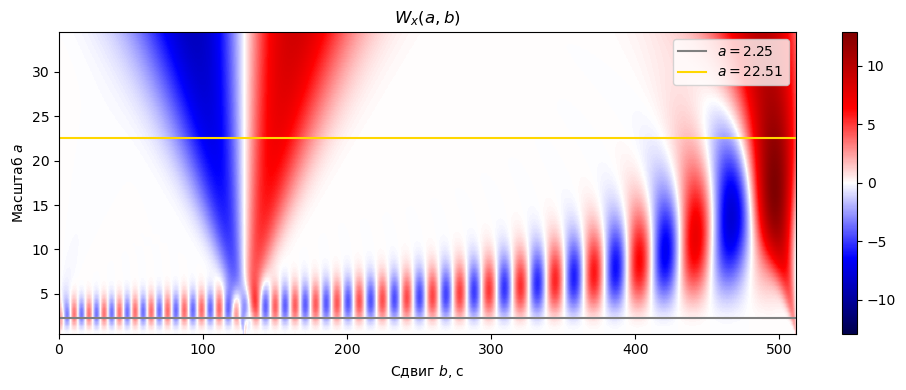

In [67]:
plt.figure(figsize=[10, 4])
max_abs = max([np.max(cwtmatr), - np.min(cwtmatr)])
plt.imshow(cwtmatr, extent=[t[0], t[-1], dt*widths[0], dt*widths[-1]], vmin = -max_abs, vmax = max_abs, 
           cmap='seismic', aspect='auto', origin='lower', )
plt.plot([t[0], t[-1]], [a0, a0], 'grey', label="$a=$%.2f" %a0)
plt.plot([t[0], t[-1]], [a1, a1], 'gold', label="$a=$%.2f" %a1)
plt.xlabel('Сдвиг $b$, c')
plt.ylabel('Масштаб $a$')
plt.title('${{W}_{x}}(a,b)$')
plt.colorbar()
plt.legend()
plt.tight_layout()

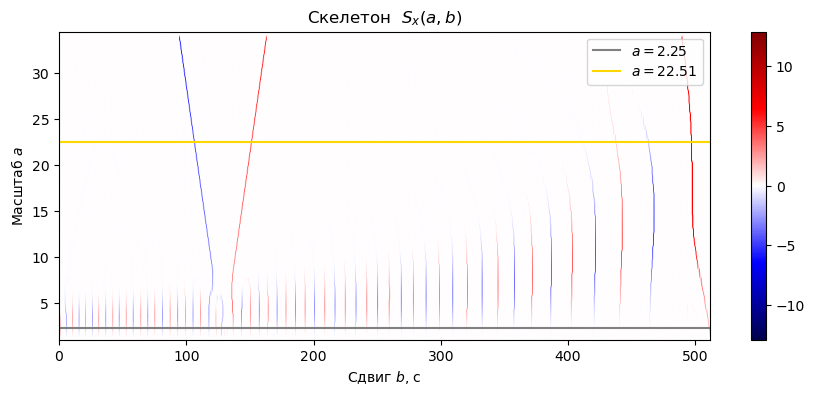

In [68]:
plt.figure(figsize=[10.5, 4])
max_abs = max([np.max(skeleton_est(cwtmatr)), - np.min(skeleton_est(cwtmatr))])

plt.imshow(skeleton_est(cwtmatr), extent=[t[0], t[-1], widths[0], widths[-1]*dt], 
           vmin = -max_abs,
           vmax = max_abs,
           cmap='seismic', aspect='auto', origin='lower')
plt.plot([t[0], t[-1]], [a0, a0], 'grey', label="$a=$%.2f" %a0)
plt.plot([t[0], t[-1]], [a1, a1], 'gold', label="$a=$%.2f" %a1)
plt.xlabel('Сдвиг $b$, c')
plt.ylabel('Масштаб $a$')
plt.title('Скелетон  ${{S}_{x}}(a,b)$')
plt.legend()
plt.colorbar()
plt.show()

## Примеры вейвлетов: вейвлеты с компактным носителем

###  FHAT-вейвлет (французкая шляпа)

$$\psi (t)=\left\{ \begin{matrix}
   1,\text{    }\ \ \left| t \right|\le 1/3,  \\
   -1/2,\ \ \ 1/3<\left| t \right|\le 1,  \\
   0,\ \text{           }\left| t \right|\ >1.  \\
\end{matrix} \right.$$


In [69]:
def DTFT(x, M=2048):
    f = np.fft.fftshift(np.fft.fftfreq(M, d=1))
    x_dtft = np.fft.fftshift(np.fft.fft(x, M))
    
    return f, x_dtft

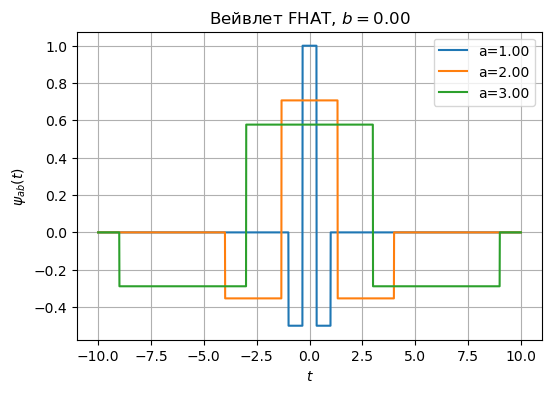

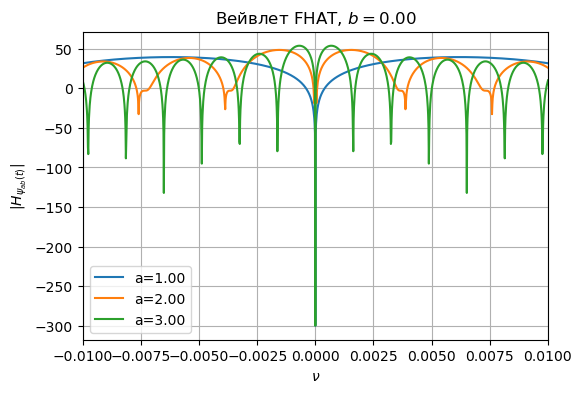

In [70]:
def fhat(t, a, b):
    ta = (t-b)/a
    if abs(ta) <= 1.0/3.0 :
        return 1.0/np.sqrt(a)
    elif abs(ta) <= 1.0 :
        return -0.5/np.sqrt(a)
    return 0.0

plt.figure(figsize=[6, 4])
t = np.linspace(-10, 10, 2**11)
b=0
for a in [1, 2, 3]:
    ta=(t-b)/a
    wavelet=[fhat(t, a, b) for t in ta]
    plt.plot(t, wavelet, label="a=%.2f" %a)
plt.legend()
plt.xlabel("$t$")
plt.title("Вейвлет FHAT, $b=$%.2f" %b)
plt.ylabel("$\\psi_{ab}(t)$")
plt.grid()


plt.figure(figsize=[6, 4])
b=0
for a in [1, 2, 3]:
    ta=(t-b)/a
    wavelet=[fhat(t, a, b) for t in ta]
    nu, H_wavelet = DTFT(wavelet, M=2**16)
    plt.plot(nu, 20*np.log10(abs(H_wavelet)+1e-15), label="a=%.2f" %a)
plt.legend()
plt.xlabel(r"$\nu$")
plt.xlim([-0.01, 0.01])
plt.title("Вейвлет FHAT, $b=$%.2f" %b)
plt.ylabel(r"$|H_{\psi_{ab}(t)}|$")
plt.grid()

### Вейвлет Хаара

$$\psi (t)=\left\{ \begin{matrix}
   1,\ \ \text{  }0\le t<1/2,  \\
   -1,\ \ \ 1/2\le t<1,  \\
   0,\ \ \text{  }t.  \\
\end{matrix} \right.$$
Он основан на ортогональной системе функций, предложенной венгерским математиком Альфредом Хааром в 1909 году.

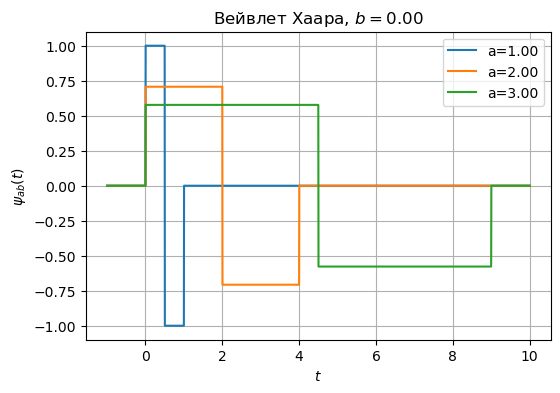

In [71]:
def haar(t, a, b):
    ta = (t-b)/a
    if 0 <= ta and ta < 0.5 :
        return 1.0/np.sqrt(a)
    elif 0.5 <= ta and ta < 1 :
        return -1.0/np.sqrt(a)
    return 0.0

plt.figure(figsize=[6, 4])
t = np.linspace(-1, 10, 2**11)
b=0
for a in [1, 2, 3]:
    ta=(t-b)/a
    wavelet=[haar(t, a, b) for t in ta]
    plt.plot(t, wavelet, label="a=%.2f" %a)
plt.legend()
plt.xlabel("$t$")
plt.title("Вейвлет Хаара, $b=$%.2f" %b)
plt.ylabel("$\\psi_{ab}(t)$")
plt.grid()

Для практического применения необходима дискретизация параметров $а$ и $b$ при  сохранении  возможности восстановления сигнала из его преобразования. Распространена так называемая диадная дискретизация, при которой 
$$ a={{2}^{m}},\ \ b=k{{2}^{m}},\ \ {{\psi }_{m,k}}(t)=\frac{1}{\sqrt{\left| a \right|}}\psi \left( \frac{t-b}{a} \right)=\frac{1}{\sqrt{{{2}^{m}}}}\psi \left( {{2}^{-m}}t-k \right),$$
где $m$ и $ k$ – целые числа. В результате плоскость$ ab$ превращается в соответствующую сетку $mk$. Параметр $m$ называется параметром масштаба.
Сигнал $x(t) \in L_2 (\mathbb{R})$ представим в виде вейвлет-ряда 
$$x(t)=\sum\limits_{m,k}{{{c}_{mk}}{{\psi }_{mk}}(t).}$$
Предположим, что базисные функции этого ряда формируются вейвлетом Хаара. Тогда базисная система будет ортонормированной: 


$$\int\limits_{-\infty }^{\infty }{{{\psi }_{mk}}(t){{\psi }_{pq}}(t)}dt=\left\{ \begin{matrix}
   1,\ \text{если }m=p\text{ и }k=q; \\
0, \text{ иначе}  \\
\end{matrix} \right.$$


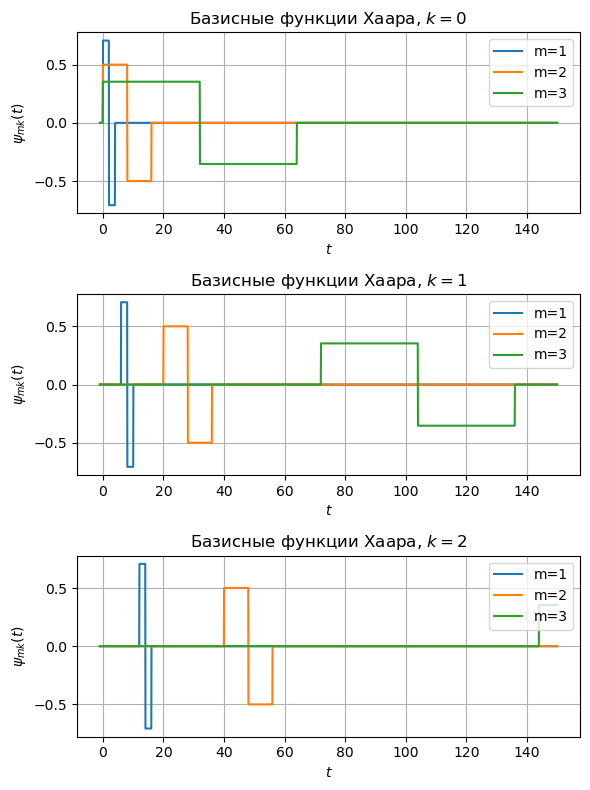

In [72]:
def haar(t, a, b):
    ta = (t-b)/a
    if 0 <= ta and ta < 0.5 :
        return 1.0/np.sqrt(a)
    elif 0.5 <= ta and ta < 1 :
        return -1.0/np.sqrt(a)
    return 0.0

plt.figure(figsize=[6, 8])
t = np.linspace(-1, 150, 2**11)
k_range=[0, 1, 2]
for k in k_range:
    plt.subplot(len(k_range), 1, k+1)
    for m in [1, 2, 3]:
        a=2**m
        b=k*a
        ta=(t-b)/a
        wavelet=[haar(t, a, b) for t in ta]
        plt.plot(t, wavelet, label="m=%i" %m)
    plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
    plt.xlabel("$t$")
    plt.title("Базисные функции Хаара, $k=$%i" %k)
    plt.ylabel("$\\psi_{mk}(t)$")
    plt.grid()
plt.tight_layout()

### Вейвлеты Добеши́

Некоторые вейвлеты не имеют явного описания в виде одной аналитической формулы, а задаются некоторыми итерационным процедурами. Примером таких вейвлетов являются функции, которые предложила Ингрид Добеши (Ingrid Daubechies).

Вейвлеты Добеши́ являются примером семейства **ортогональных** вейвлетов с **компактным** носителем. При этом в это семейство входят вейвлеты Хаара (для них порядок $p=1$), которые, как мы ранее уставили, являются ортогональными с компактным носителем.

`scipy.signal.daub` https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.daub.html#scipy.signal.daub

#### scipy.signal.daub(p)

The coefficients for the FIR low-pass filter producing Daubechies wavelets.
```p>=1``` gives the order of the zero at ```f=1/2```. There are ```2p``` filter coefficients.

**Parameters**

```p``` *int*
Order of the zero at ```f=1/2```, can have values from 1 to 34.

**Returns**

```daub``` *ndarray* Return

#### scipy.signal.cascade(hk, J=7)
Return ```(x, phi, psi)``` at dyadic points ```K/2**J``` from filter coefficients.

**Parameters**

```hk``` *array_like* Coefficients of low-pass filter.

```J``` *int*, *optional*
Values will be computed at grid points ```K/2**J```. Default is 7.

**Returns**

```x``` *ndarray*
The dyadic points ```K/2**J for K=0...N * (2**J)-1``` where ```len(hk) = len(gk) = N+1```.

```phi``` *ndarray*
The scaling function phi(x) at x: ```phi(x) = sum(hk * phi(2x-k))```, where ```k``` is from 0 to N.

```psi``` *ndarray, optional*
The wavelet function psi(x) at x: ```phi(x) = sum(gk * phi(2x-k))```, where ```k``` is from 0 to N. ```psi``` is only returned if ```gk``` is not None.

In [73]:
daub=signal.daub(p=2)
daub

array([ 0.48296291,  0.8365163 ,  0.22414387, -0.12940952])

In [74]:
x, phi, psi = signal.cascade(hk=daub, J=7)

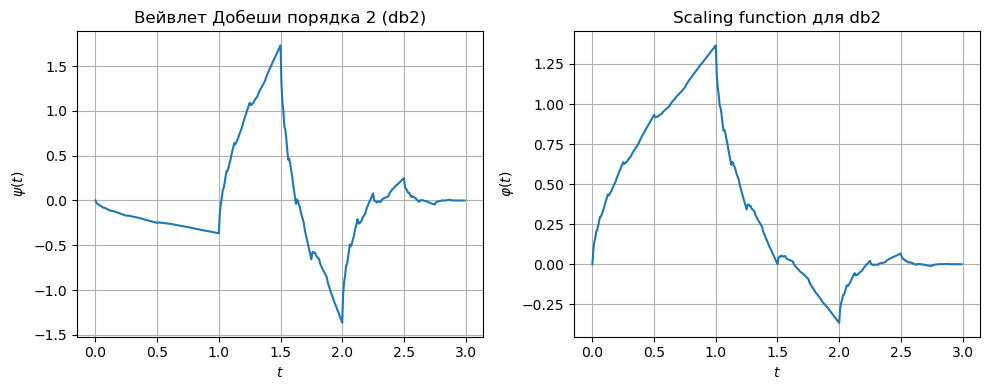

In [75]:
plt.figure(figsize=[10, 4])
plt.subplot(1, 2, 1)
plt.plot(x, psi)
plt.title("Вейвлет Добеши порядка 2 (db2)")
plt.xlabel("$t$")
plt.ylabel("$\\psi(t)$")
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(x, phi)
plt.title("Scaling function для db2")
plt.xlabel("$t$")
plt.ylabel("$\\varphi(t)$")
plt.grid()
plt.tight_layout()

Рассмотрим кратко вычисление вейвлета Добеши $\psi(t)$ порядка $p=2$. 

Построение производится с помощью некоторой функции $\varphi(t)$ (scaling function) с компактным носителем в виде отрезка $t\in [0,\;3]$. $\varphi(t)$ не может быть выражена через элементарные функции, но может быть вычислена с помощью рекурсивной процедуры. Выбираются начальные значения 

$\varphi(0)=0$, $\varphi(1)=\dfrac{1+\sqrt{3}}{2}$, $\varphi(2)=\dfrac{1-\sqrt{3}}{2}$, $\varphi(3)=0$.

Затем $\varphi(t)$ (scaling function) вычисляется с использованием рекурсивной формулы:

$\varphi(t)=\sqrt{2} \left( h_0\varphi(2t)+h_1\varphi(2t-1)+h_2 \varphi(2t-2)+h_3 \varphi(2t-3) \right)$ 

Коэффициенты $h_0$ мы определяли функцией `signal.daub(p=2)`. По значением $\varphi(t)$ вычисляются отсчеты вейвлета Добеши $\psi(t)$:

$\psi(t)=\sqrt{2} \left( -h_0\varphi(2t-1)+h_1\varphi(2t)-h_2 \varphi(2t+1)+h_3 \varphi(2t+2) \right)$

В результате процедуры получаем отсчеты функции с компактным носителем $\psi(t)$.

Несмотря на отсуствие аналитической формулы, вейвлеты Добеши удобны при вычислении быстрого вейвлет-преобразования (см. алгоритм Малла)

In [76]:
hk=signal.daub(p=2)
hk

array([ 0.48296291,  0.8365163 ,  0.22414387, -0.12940952])

In [77]:
signal.qmf(hk)

array([-0.12940952, -0.22414387,  0.8365163 , -0.48296291])

In [78]:
sum(hk)

1.414213562373095

In [79]:
np.linalg.norm(hk)

1.0

## Быстрое вейвлет-преобразование алгоритмом Малла

Представим исходный сигнал $x(t)$ как сумму аппроксимирующей $A_m(t)$ и $m$ детализирующих $D_j(t)$, составляющих:
$$x(t)=A_m(t) + \sum_{j=1}^{m} D_j(t).$$





Эти составляющие далее представим в виде рядов по ортонормированным базисным функциям.

* $m=0$. 
$$x(t)=A_0(t)=\sum_{k} a_{0k}\varphi_{0k}(t)$$

Сигнал будет представлен последовательностью коэффициентов $a_{0k}$.

* $m=1$
$$x(t)=A_1(t)+D_1(t)=\sum_{k} a_{1k}\varphi_{1k}(t)+\sum_{k} d_{1k}\psi_{1k}(t)$$
Сигнал будет представлен последовательностями коэффициентов $a_{1k}$ и $d_{1k}$. При конечном числе коэффицентов разложения, длина последователельностей $a_{1k}$ и $d_{1k}$ в два раза меньше, чем у $a_{0k}$.

* $m\ge2$

На каждом следующем шаге декомпозируется аппроксимационная составляющая сигнала $A_{m-1}(t)$ с предыдущего шага. 

Для **дискретного сигнала** $x[k]$ коэффициенты разложения $a_{1k}$,  $d_{1k}$, $a_{2k}$,  $d_{2k}$ ... могут быть найдены в результатте работы алгоритма Малла, который может быть представлен в виде следущих блок-схем.

* Уровень декомпозиции $m=1$.

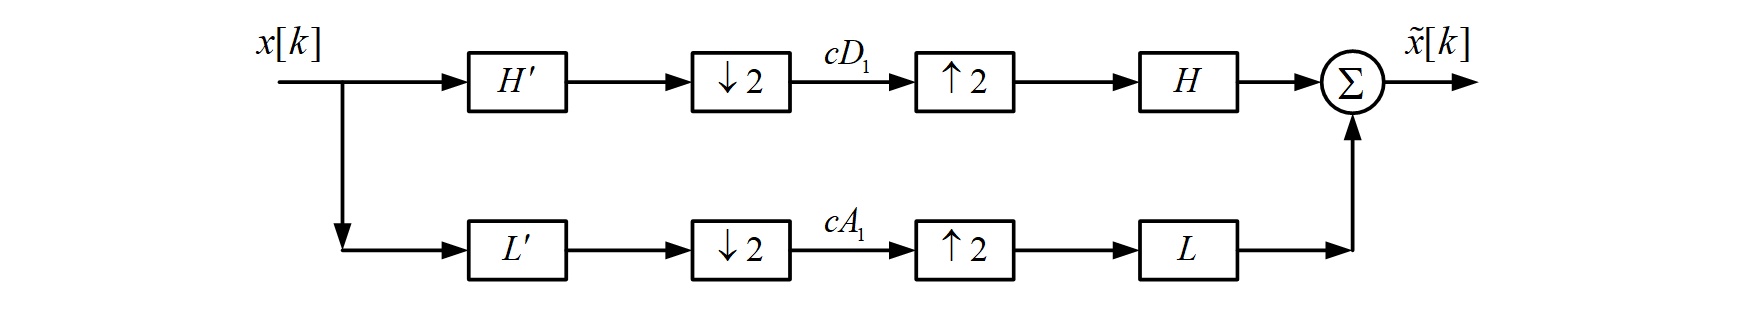

$$cD_1=d_{1k}, \;\; cA_1=a_{1k}$$

$H'$, $L'$ - зеркально-квадратурные фильтры верхних и нижних частот для декомпозиции.

$H$, $L$ -  зеркально-квадратурные фильтры верхних и нижних частот для реконструкции.

Импульсные харакетристики этих фильтров для случая вейвлетов Добеши можно найти, например,  на сайте http://wavelets.pybytes.com/wavelet/db2/ .

* Уровень декомпозиции $m=2$.

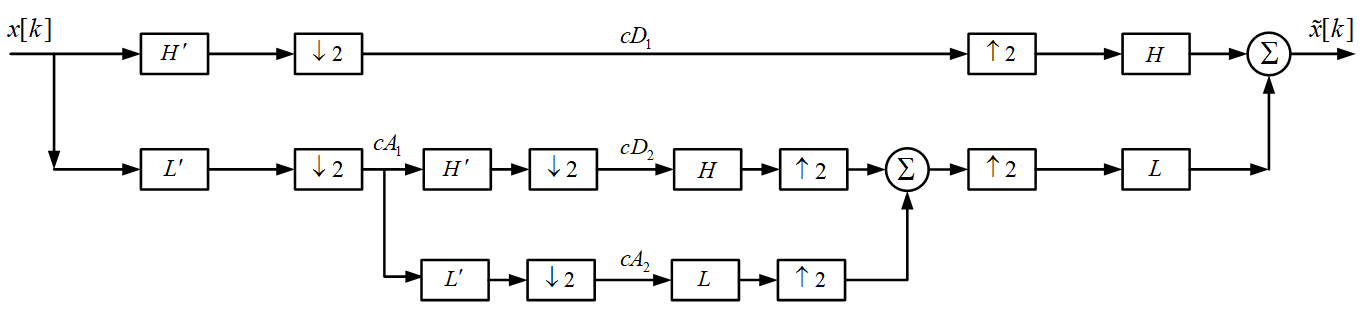

$$cD_1=d_{1k}, \;\;cD_2=d_{2k}, \;\; cA_2=a_{2k}$$

Reconstruction low-pass filter $L$ for db

In [80]:
hk=signal.daub(p=2)
hk

array([ 0.48296291,  0.8365163 ,  0.22414387, -0.12940952])

Reconstruction high-pass filter  $H$ for db

In [81]:
qmf = signal.qmf(hk)
qmf

array([-0.12940952, -0.22414387,  0.8365163 , -0.48296291])

Decomposition low-pass filter $L'$ for db

In [82]:
hk_dec = np.flip(hk)
hk_dec

array([-0.12940952,  0.22414387,  0.8365163 ,  0.48296291])

Decomposition high-pass filter  $H'$ for db

In [83]:
qmf_dec = np.flip(qmf)
qmf_dec

array([-0.48296291,  0.8365163 , -0.22414387, -0.12940952])

Фильтры $L'$  и $H'$ являются зеркально-квадратурными. 

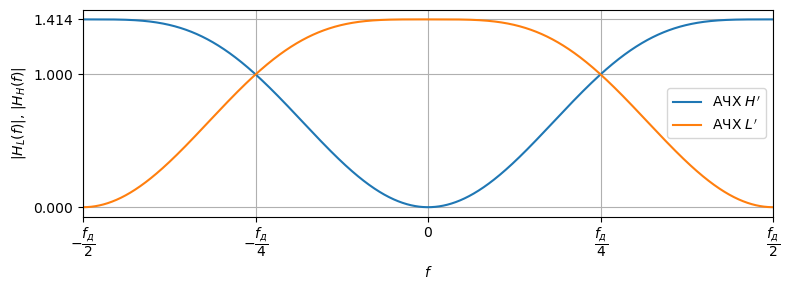

In [84]:
Q=2**11
L=np.fft.fftshift(np.fft.fft(hk_dec, Q))
H=np.fft.fftshift(np.fft.fft(qmf_dec, Q))
nu=np.arange(Q)/Q-0.5
plt.figure(figsize=[8, 3])
plt.plot(nu, abs(H), label="АЧХ ${H}'$")
plt.plot(nu, abs(L), label="АЧХ ${L}'$")
plt.yticks([0, 1, np.sqrt(2)])
labels=("$-\\dfrac{f_д}{2}$", "$-\\dfrac{f_д}{4}$", "$0$", "$\\dfrac{f_д}{4}$", "$\\dfrac{f_д}{2}$")
plt.xticks([-0.5, -0.25, 0, 0.25, 0.5], labels=labels)
plt.xlim([-0.5, 0.5])
plt.ylabel("$|H_L(f)|$, $|H_H(f)|$")
plt.xlabel("$f$")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

### Пример: быстрое вейвлет-преобразование с функциями Добеши

In [85]:
t=np.arange(0, stop=200, step=0.02)
signal1  = np.sin(2 * np.pi * 0.03 * t) + np.sin(2 * np.pi * 0.03*5 * t) 

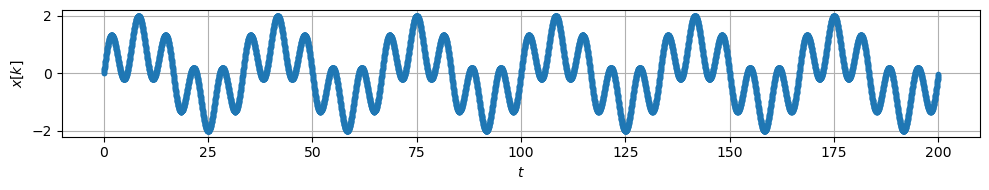

In [86]:
plt.figure(figsize=[10, 2])
plt.plot(t, signal1, '.')
plt.xlabel("$t$")
plt.ylabel("$x[k]$")
plt.tight_layout()
plt.grid()

`pywt.wavedec` выводит `[cA_n, cD_n, cD_n-1, …, cD2, cD1] : list`

In [87]:
coeffs = pywt.wavedec(signal1, 'db1')
#coeffs

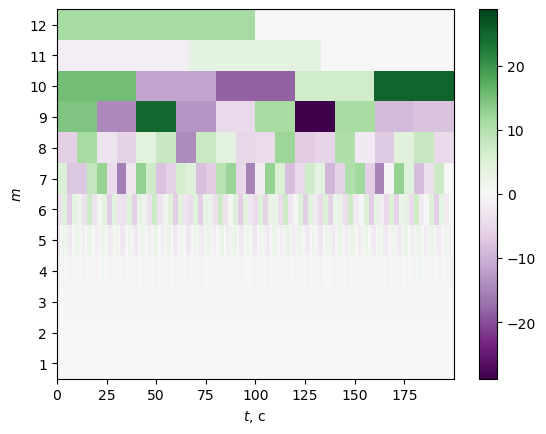

In [88]:
def dwt_image(coeffs, tmax):
    coeffs=coeffs[1::]
    plt.figure()
    max_level=len(coeffs)
    bottom = max_level-1
    vmax = max(map(lambda x: max(abs(x)), coeffs))
    vmin = -vmax
    for row in range(max_level):
        a = 2.0 ** (row - max_level)
        plt.imshow(
            X=np.resize(coeffs[row],(1, len(coeffs[row]))),
            interpolation = 'nearest',
            vmin = vmin,
            vmax = vmax,
            extent = [0, tmax, bottom-0.5, bottom + 0.5], cmap='PRGn', aspect='auto', origin='lower')
        bottom -= 1
    plt.xlabel('$t$, c ')
    plt.ylabel('$m$')
    plt.xlim([0, tmax])
    plt.ylim([0.5, max_level-0.5])
    plt.yticks(np.arange(1, max_level))
    plt.colorbar()
    plt.show()
dwt_image(coeffs, tmax=float(t[-1]))

Если нормализацию сделать для каждого $m$ отдельно.

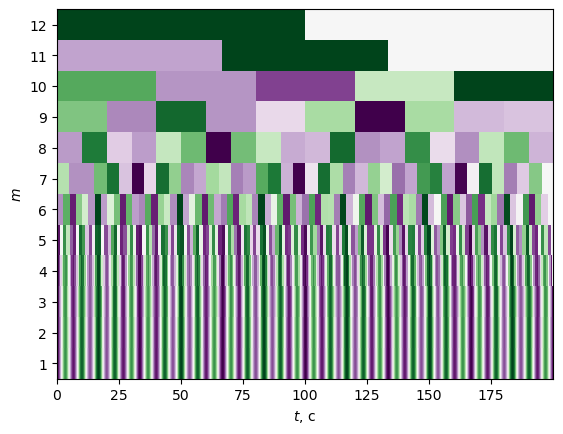

In [89]:
def dwt_image(coeffs, tmax):
    coeffs=coeffs[1::]
    plt.figure()
    max_level=len(coeffs)
    bottom = max_level-1
    
    for row in range(max_level):
        a = 2.0 ** (row - max_level)
        vmax = max(map(lambda x: max(abs(coeffs[row])), coeffs))
        vmin = -vmax
        plt.imshow(
            X=np.resize(coeffs[row],(1, len(coeffs[row]))),
            interpolation = 'nearest',
            vmin = vmin,
            vmax = vmax,
            extent = [0, tmax, bottom-0.5, bottom + 0.5], cmap='PRGn', aspect='auto', origin='lower')
        bottom -= 1
    plt.xlabel('$t$, c ')
    plt.ylabel('$m$')
    plt.xlim([0, tmax])
    plt.ylim([0.5, max_level-0.5])
    plt.yticks(np.arange(1, max_level))
    plt.show()
dwt_image(coeffs, tmax=float(t[-1]))

### Пример: вейлет-анализ и синтез с функциями Хаара ('db1') в двумерном случае

In [90]:
wavelet = pywt.Wavelet('db1')
print(wavelet)

Wavelet db1
  Family name:    Daubechies
  Short name:     db
  Filters length: 2
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


In [91]:
original = pywt.data.camera()

In [92]:
original

array([[200, 200, 200, ..., 189, 190, 190],
       [200, 199, 199, ..., 190, 190, 190],
       [199, 199, 199, ..., 190, 190, 190],
       ...,
       [ 25,  25,  27, ..., 139, 122, 147],
       [ 25,  25,  26, ..., 158, 141, 168],
       [ 25,  25,  27, ..., 151, 152, 149]], dtype=uint8)

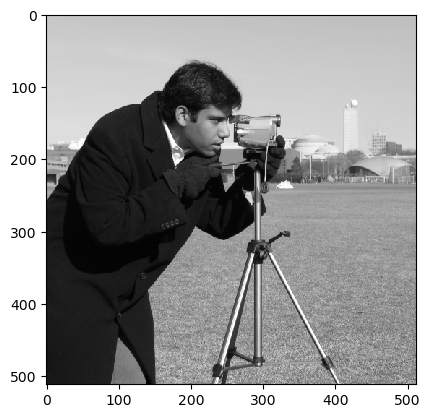

In [93]:
plt.figure()
plt.imshow(original, interpolation="nearest", cmap=plt.cm.gray)
plt.show()

In [94]:
coeffs = pywt.wavedec2(original, 'db1')
coeffs

[array([[66079.09179688]]),
 (array([[11897.61914063]]),
  array([[-17088.53710938]]),
  array([[3464.42773437]])),
 (array([[ 1.30750977e+04,  5.06541797e+03],
         [-4.73798828e+03, -5.14062500e+00]]),
  array([[ 5224.87109375, -2723.29296875],
         [-9837.35546875, -1124.03125   ]]),
  array([[ 2434.93359375,  2459.24609375],
         [ 2443.30859375, -1253.875     ]])),
 (array([[ -496.9296875,  6809.84375  ,   -55.03125  ,  -588.53125  ],
         [ 5224.3046875,  2601.5234375,  4946.3046875,  3490.171875 ],
         [   99.5      , -5169.578125 , -1224.1484375,   452.1328125],
         [-1271.0390625,   379.109375 ,   142.4453125,   -32.0546875]]),
  array([[  113.0859375,  2180.625    ,  -461.4375   ,    93.984375 ],
         [ 6010.5703125, -2054.1484375, -3522.0859375,  -143.1875   ],
         [  -13.71875  , -3425.328125 , -2459.0546875,    47.4453125],
         [-1258.5859375, -1902.       ,  -748.0859375,   108.2265625]]),
  array([[  -77.1015625, -2020.734375 ,   5

In [95]:
len(coeffs)

10

In [96]:
coeffs = pywt.wavedec2(original, 'db1')
for level in [-1, -2]:
    coeffs[level] = tuple([np.zeros_like(v) for v in coeffs[level]])
new = pywt.waverec2(coeffs, 'db1')

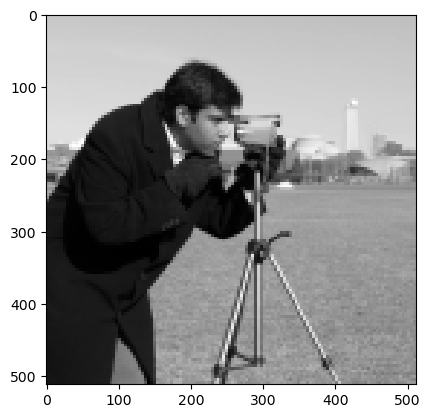

In [97]:
plt.figure()
plt.imshow(new, interpolation="nearest", cmap=plt.cm.gray)
plt.show()

In [98]:
coeffs = pywt.wavedec2(original, 'db1')
for level in range(7):
    coeffs[level] = tuple([np.zeros_like(v) for v in coeffs[level]])
new = pywt.waverec2(coeffs, 'db1')

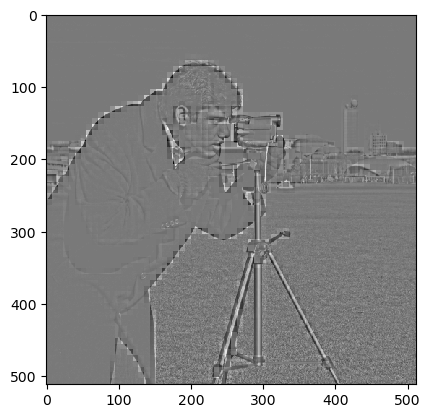

In [99]:
plt.figure()
plt.imshow(new, interpolation="nearest", cmap=plt.cm.gray)
plt.show()

## Примеры вейвлет-преобразований для разных $\psi(t)$.

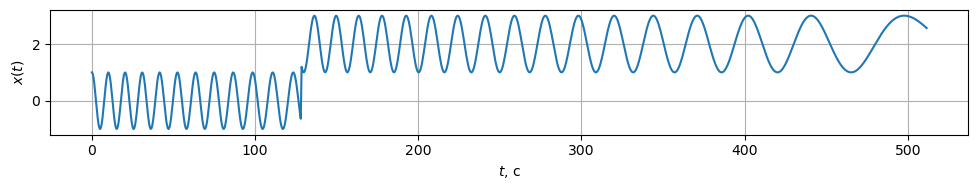

In [100]:
t = np.linspace(0, 512, 1024, endpoint=False)
dt=t[1]-t[0]
step = np.zeros_like(t)
for u in range(len(step)):
    if u > len(step)//4:
        step[u]=2

sig  = signal.chirp(t, f0=1/10, f1=1/100, t1=512, method='linear') + step

widths = np.arange(1, 70)
cwtmatr = signal.cwt(sig, signal.ricker, widths)

plt.figure(figsize=[10, 2])
plt.plot(t, sig)
plt.xlabel("$t$, c")
plt.ylabel("$x(t)$")
plt.tight_layout()
plt.grid()

In [101]:
def wave_wavelet(points, a):
    t = np.arange(0, points) - (points - 1.0) / 2
    ta=t/a
    return -ta*np.exp(-ta**2/2) / np.sqrt(a)

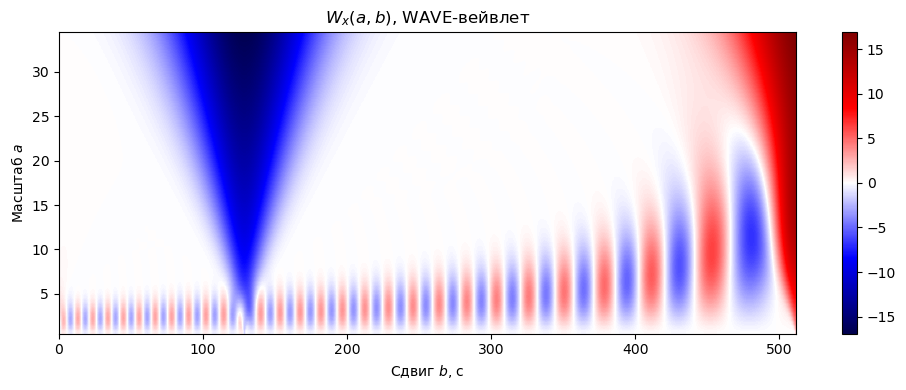

In [102]:
widths = np.arange(1, 70)
cwtmatr = signal.cwt(sig, wave_wavelet, widths)

plt.figure(figsize=[10, 4])
max_abs = max([np.max(cwtmatr), - np.min(cwtmatr)])
plt.imshow(cwtmatr, extent=[t[0], t[-1], dt*widths[0], dt*widths[-1]], vmin = -max_abs, vmax = max_abs, 
           cmap='seismic', aspect='auto', origin='lower', )
plt.xlabel('Сдвиг $b$, c')
plt.ylabel('Масштаб $a$')
plt.title('${{W}_{x}}(a,b)$, WAVE-вейвлет')
plt.colorbar()
plt.tight_layout()

In [103]:
def haar_coef(ta, a):
    if 0 <= ta and ta < 0.5 :
        return 1.0/np.sqrt(a)
    elif 0.5 <= ta and ta < 1 :
        return -1.0/np.sqrt(a)
    return 0.0

def haar_wavelet(points, a):
    t = np.arange(0, points) - (points - 1.0) / 2
    ta=t/a
    res=np.zeros_like(t)
    for u in range(len(res)):
        res[u]=haar_coef(ta[u], a)
    return res   

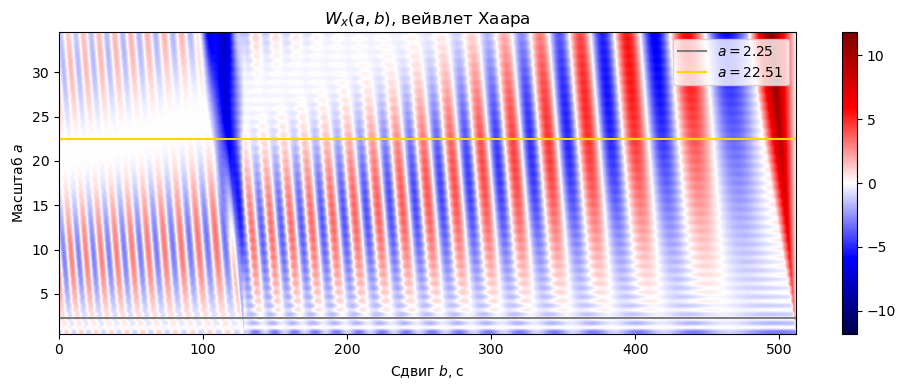

In [104]:
widths = np.arange(1, 70)
cwtmatr = signal.cwt(sig, haar_wavelet, widths)

plt.figure(figsize=[10, 4])
max_abs = max([np.max(cwtmatr), - np.min(cwtmatr)])
plt.imshow(cwtmatr, extent=[t[0], t[-1], dt*widths[0], dt*widths[-1]], vmin = -max_abs, vmax = max_abs, 
           cmap='seismic', aspect='auto', origin='lower', )
plt.plot([t[0], t[-1]], [a0, a0], 'grey', label="$a=$%.2f" %a0)
plt.plot([t[0], t[-1]], [a1, a1], 'gold', label="$a=$%.2f" %a1)
plt.xlabel('Сдвиг $b$, c')
plt.ylabel('Масштаб $a$')
plt.title('${{W}_{x}}(a,b)$, вейвлет Хаара')
plt.colorbar()
plt.legend()
plt.tight_layout()

## Список литературы
* [1]  Н. М. Астафьева, “Вейвлет-анализ: основы теории и примеры применения”, УФН, 166:11 (1996), 1145–1170  http://www.mathnet.ru/php/archive.phtml?wshow=paper&jrnid=ufn&paperid=1260&option_lang=rus
* [2] А.Н. Яковлев. Введение в вейвлет-преобразование: Учебное пособие. - Новосибирск: Изд-во НГТУ, 2003. – 104 с.
* [3] Витязев В.В. Вейвлет-анализ временных рядов: Учебное пособие. – СПб.: Изд-во С.-Петерб. Ун-та, 2001. – 58 с.
* [4] Чуи К. Введение в вэйвлеты. — М. : Мир, 2001. — 412 с
* [5] Добеши, Ингрид. Десять лекций по вейвлетам = Ten Lectures on Wavelets : научное издание / И. Добеши ; перевод с английского Е. В. Мищенко ; под редакцией А. П. Петухова. - Москва ; Ижевск : Регулярная и хаотическая динамика, 2001. - 463 с.
* [6] Gregory R. Lee, Ralf Gommers, Filip Wasilewski, Kai Wohlfahrt, Aaron O’Leary (2019). PyWavelets: A Python package for wavelet analysis. Journal of Open Source Software, 4(36), 1237, https://doi.org/10.21105/joss.01237.
* [7] Малла С. Вейвлеты в обработке сигналов. Пер. с англ. – М.: Мир, 2005. –671 с., ил. 
* [8] PyWavelets https://pywavelets.readthedocs.io/

